<a href="https://colab.research.google.com/github/beniciowg/data-science-projects/blob/master/S%C3%A9ries_Temporais_Forecasting_com_Prophet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Previsão de Séries Temporais com Prophet

Fazer previsões em conjuntos de dados temporais não é uma tarefa fácil. A aplicação de modelos estatísticos complexos para que se possa compreender os efeitos de sazonalidade e mudanças de tendência fazem com que seja necessário alto conhecimento e experiência por parte de analistas, cientistas e engenheiros de dados que lidam com séries temporais.

É comum encontrar na literatura distinção entre previsões estatísticas, que representam a aplicação de um modelo em uma base de dados histórica, e previsões gerenciais, que compreendem as previsões feitas por profissionais com base em sua experiência do que funciona melhor.

<p align="center"><img src="https://docs.google.com/uc?export=download&id=14xIqHv3fu8Hp0kdL3LX9rQxGNYhmr86j" height="200px"></p>


Previsões estatísticas possuem a vantagem de não ser necessário grande conhecimento de negócio por parte do profissional e, também, de ser facilmente escalável. Já as previsões gerenciais costumam possuir mais informações e se adaptar melhor a mudanças, porém demandam maior experiência e esforço por parte dos profissionais.

Encarando esses desafios no dia a dia da empresa, o Facebook desenvolveu um *framework* para previsão de séries temporais chamado ***Prophet***. Esse *framework* tem como objetivo unir as vantagens de ambos os tipos de previsões. Sendo assim, ele permite que o usuário consiga realizar ajustes de maneira fácil e intuitiva, permitindo-o usar sua experiência para aprimorar o modelo.

<p align="center"><img src="https://raw.githubusercontent.com/carlosfab/escola-data-science/master/img/prophet.png" height="300px"></p>

## Modelo Preditivo do Prophet

Como foi desenvolvido pelo Facebook, o ***Prophet*** foca em resolver os problemas encarados pela empresa. Portanto, o modelo é forte em resolver problemas com as seguintes características:

* Dados coletados por um longo período (meses ou anos) e com grande detalhamento histórico.
* Sazonalidades fortes e destacadas.
* Feriados ou datas especiais já conhecidas.
* Tendência de crescimento não linear, que se aproxima de um limite.

O *framework* utiliza um modelo aditivo que pode ser decomposto em três componentes principais: tendência, sazonalidade e feriados. Abaixo está a equação utilizada pelo modelo:

$$
y(t) = g(t) + s(t) + h(t) + \varepsilon_t
$$

onde:

* $g(t)$ é a tendência, que modela as mudanças não-periódicas no valor da série temporal;
* $s(t)$ representa as mudanças periódicas (como sazonalidade semanal, anual, etc);
* $h(t)$ representa os efeitos dos feriados; e
* $\varepsilon_t$ é o erro, as mudanças que não são capturadas pelo modelo (assume-se esse como tendo uma distribuição normal).

Vale ressaltar que na documentação oficial do ***Prophet*** é descrito o grande trabalho que foi feito para se encontrar os melhores parâmetros utilizados como padrão para o modelo. Desta forma, geralmente não são necessários muitos ajustes para que o modelo obtenha uma boa performance em diferentes conjuntos de dados e aplicações.

## O Problema de um Abrigo de Animais

Para mostrar como o ***Prophet*** pode ser aplicado, iremos utilizar um conjunto de dados do abrigo de animais ***Austin Animal Center***, Texas. Como definido no próprio site, é uma "instalação aberta a receber animais que necessitem abrigo indepente de idade, saúde, espécie ou raça e que sejam da região de Austin e de Travis County. O objetivo do ***Austin Animal Center*** é encontrar um lar permanente para todos os animais que chegam ao abrigo."

Nem sempre é possível encontrar um lar para todos os animais, os quais por vezes acabam tendo desfechos negativos. Porém, a meta do abrigo é que a taxa de adoção e devolução aos donos seja superior a 90%.

<p align="center"><img src="https://docs.google.com/uc?export=download&id=11nW1gN6nhmFSIlbvXQ3NL25sI0DciMne" height="200px"></p>
<p align="center" href='https://www.freepik.com/vectors/love'>Love vector created by freepik - www.freepik.com</p>

Neste projeto iremos analisar os desfechos positivos dos animais, ou seja, as adoções e retorno aos donos. Assim, poderemos encontrar padrões neles e, além disso, fazer previsões das saídas de animais do abrigo, as quais ajudarão a:

* Planejar estoque e compras de insumos (remédios, comida, etc);
* Antecipar a necessidade de contratação de funcionários e colaboradores; e
* Fazer campanhas visando otimizar a adoção de animais.

## Aquisição dos Dados
Os dados foram disponibilizados pelo [Austin Animal Center](http://www.austintexas.gov/content/austin-animal-center) e podem ser baixados diretamente no [City of Austin Open Data Portal](https://data.austintexas.gov/Health-and-Community-Services/Austin-Animal-Center-Outcomes/9t4d-g238). A última atualização foi em 30 de abril de 2020. Abaixo segue um dicionário das variáveis:
* `Animal ID`: código de identificação do animal.
* `Name`: nome do animal.
* `DateTime`: data e hora da saída do animal do abrigo.
* `MonthYear`: coluna contendo somente o mês e o ano da saída do animal do abrigo (acaba aparecendo a data completa aqui). 
* `Date of Birth`: data de nascimento do animal. Em alguns casos pode ser a data estimada.
* `Outcome Type`: desfecho do animal.
* `Outcome Subtype`: dá mais detalhes sobre o destino que foi dado ao animal.
* `Animal Type`: espécie do animal.
* `Sex upon Outcome`: sexo do animal. Registra também se o animal foi castrado.
* `Age upon Outcome`: idade do animal na data da saída.
* `Breed`: raça do animal.
* `Color`: cor do animal.

## Análise Exploratória

Inicialmente, iremos explorar nossos dados para descobrir mais sobre as informações que eles contém.

In [1]:
# importar as bibliotecas necessárias
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from fbprophet import Prophet
from fbprophet.plot import add_changepoints_to_plot
from fbprophet.diagnostics import cross_validation
from fbprophet.diagnostics import performance_metrics
from fbprophet.plot import plot_cross_validation_metric

# configurar as visualizações
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

# importar os dados
df = pd.read_csv('https://github.com/carlosfab/escola-data-science/blob/master/datasets/shelter_animal_outcomes.csv?raw=true')

# ver as primeiras 5 linhas
df.head()

,Animal ID,Name,DateTime,MonthYear,Date of Birth,Outcome Type,Outcome Subtype,Animal Type,Sex upon Outcome,Age upon Outcome,Breed,Color
0,A794011,Chunk,05/08/2019 06:20:00 PM,05/08/2019 06:20:00 PM,05/02/2017,Rto-Adopt,NaN,Cat,Neutered Male,2 years,Domestic Shorthair Mix,Brown Tabby/White
1,A776359,Gizmo,07/18/2018 04:02:00 PM,07/18/2018 04:02:00 PM,07/12/2017,Adoption,NaN,Dog,Neutered Male,1 year,Chihuahua Shorthair Mix,White/Brown
2,A720371,Moose,02/13/2016 05:59:00 PM,02/13/2016 05:59:00 PM,10/08/2015,Adoption,NaN,Dog,Neutered Male,4 months,Anatol Shepherd/Labrador Retriever,Buff
3,A674754,NaN,03/18/2014 11:47:00 AM,03/18/2014 11:47:00 AM,03/12/2014,Transfer,Partner,Cat,Intact Male,6 days,Domestic Shorthair Mix,Orange Tabby
4,A689724,*Donatello,10/18/2014 06:52:00 PM,10/18/2014 06:52:00 PM,08/01/2014,Adoption,NaN,Cat,Neutered Male,2 months,Domestic Shorthair Mix,Black


In [23]:
# verificar o tamanho do dataset
print(f'Entradas: {df.shape[0]}')
print(f'Colunas: {df.shape[1]}', '\n')

# verificar informações sobre as colunas
df.info()

Entradas: 117416
Colunas: 12 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 117416 entries, 0 to 117415
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Animal ID         117416 non-null  object        
 1   Name              80599 non-null   object        
 2   DateTime          117416 non-null  datetime64[ns]
 3   MonthYear         117416 non-null  object        
 4   Date of Birth     117416 non-null  object        
 5   Outcome Type      117408 non-null  object        
 6   Outcome Subtype   53247 non-null   object        
 7   Animal Type       117416 non-null  object        
 8   Sex upon Outcome  117413 non-null  object        
 9   Age upon Outcome  117369 non-null  object        
 10  Breed             117416 non-null  object        
 11  Color             117416 non-null  object        
dtypes: datetime64[ns](1), object(11)
memory usage: 10.7+ MB


Podemos verificar que nosso *dataset* possui 117416 entradas e que a coluna DateTime está com o tipo `object` e deve ser alterada para `datetime`. Além disso, percebe-se que algumas colunas possuem valores faltantes.

In [3]:
# transformar a coluna DateTime para o tipo datetime
df['DateTime'] = pd.to_datetime(df['DateTime'])

# verificar se o tipo da coluna mudou
df['DateTime'].dtype

dtype('<M8[ns]')

In [4]:
# verificar a porcentagem de valores nulos de cada coluna
print('Porcentagem de valores nulos por coluna:', '\n')

for col in df.columns:
  print(f'{col}: {round(df[col].isnull().sum() / df.shape[0], 4)}')

Porcentagem de valores nulos por coluna: 

Animal ID: 0.0
Name: 0.3136
DateTime: 0.0
MonthYear: 0.0
Date of Birth: 0.0
Outcome Type: 0.0001
Outcome Subtype: 0.5465
Animal Type: 0.0
Sex upon Outcome: 0.0
Age upon Outcome: 0.0004
Breed: 0.0
Color: 0.0


Somente as colunas `Name` e `Outcome Subtype` possuem quantidades consideráveis de valores nulos. No entanto, como nossos modelos de *forecasting* terão como entrada somente a data e a contagem de saídas do abrigo por dia, não será necessário tratar esses valores.

Vamos verificar agora quais espécies de animais mais têm saída do abrigo.

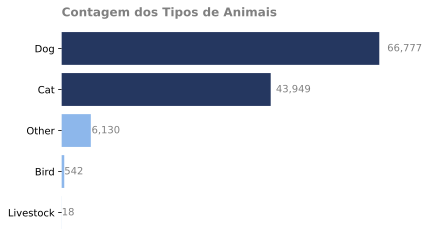

In [6]:
# verificar o tipo de animal que mais é adotado

# definir as cores
AZUL1, AZUL2 = "#8db7eb", "#253760"
cores = [AZUL2, AZUL2, AZUL1, AZUL1, AZUL1]

# criando uma função para colocar os valores ao lado das barras
def autolabel(rects):
    for rect in rects:
        width = rect.get_width()
        plt.text(1.025*rect.get_width(), rect.get_y()+0.5*rect.get_height(),
                 '{:,.0f}'.format(int(width)),
                 ha='left', va='center', color='grey')
        
# criando a figura que vai conter o gráfico
fig, ax = plt.subplots()

# criando o gráfico
g = ax.barh(y=df['Animal Type'].value_counts().index,
        width=df['Animal Type'].value_counts().values,
        color=cores)

# colocando do maior para o menor
plt.gca().invert_yaxis()

# retirando as bordas
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)

# remover eixo x
plt.gca().axes.get_xaxis().set_visible(False)

# colocando os valores de cada tipo de animal
autolabel(g)

# colocando o título no gráfico
ax.set_title('Contagem dos Tipos de Animais', 
             loc='left', color='grey', fontweight='bold')
plt.show()

Como esperado, cães e gatos são as espécies mais presentes no abrigo. É interessante notar que até gado já passou por lá. Vamos verificar quais são os desfechos mais comuns para os animais do abrigo.

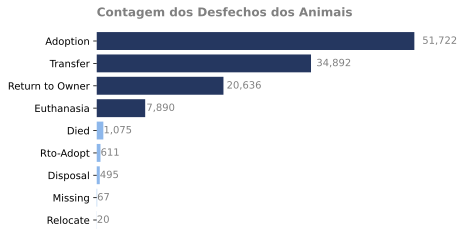

In [25]:
# verificar os desfechos mais comum para os animais

# definir as cores
AZUL1, AZUL2 = "#8db7eb", "#253760"
cores = [AZUL2, AZUL2, AZUL2, AZUL2, AZUL1, AZUL1, AZUL1, AZUL1, AZUL1]

# criando uma função para colocar os valores ao lado das barras
def autolabel(rects):
    for rect in rects:
        width = rect.get_width()
        plt.text(1.025*rect.get_width(), rect.get_y()+0.5*rect.get_height(),
                 '{:,.0f}'.format(int(width)),
                 ha='left', va='center', color='grey')
        
# criando a figura que vai conter o gráfico
fig, ax = plt.subplots()

# criando o gráfico
g = ax.barh(y=df['Outcome Type'].value_counts().index,
        width=df['Outcome Type'].value_counts().values,
        color=cores)

# colocando do maior para o menor
plt.gca().invert_yaxis()

# retirando as bordas
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)

# remover eixo x
plt.gca().axes.get_xaxis().set_visible(False)

# colocando os valores de cada tipo de animal
autolabel(g)

ax.set_title('Contagem dos Desfechos dos Animais', 
             loc='left', color='grey', fontweight='bold')
plt.show()

In [32]:
# verificar a porcentagem de animais com desfecho positivo
print('Porcentagem de animais com desfechos positivos:')
print(round(df[(df['Outcome Type'] == 'Adoption') | (df['Outcome Type'] == 'Return to Owner') | (df['Outcome Type'] == 'Rto-Adopt')].shape[0] / df.shape[0], 2), '\n')

# verificar a quantidade de animais com desfecho negativo
print('Porcentagem de animais desaparecidos e mortos:')
print(round(df[(df['Outcome Type'] == 'Died') | (df['Outcome Type'] == 'Missing') | (df['Outcome Type'] == 'Euthanasia')].shape[0] / df.shape[0], 2))

Porcentagem de animais com desfechos positivos:
0.62 

Porcentagem de animais desaparecidos e mortos:
0.08


Verificamos que 62% dos animais são adotados ou retornam para os seus donos. Infelizmente, 8% dos animais estão sumidos, morreram de causas naturais ou sofreram eutanásia. O restante deles foram transferidos ou realocados.

Para continuar nossas análises devemos criar uma nova coluna contendo o valor 1 para cada entrada para que possamos realizar operações de soma relacionadas ao número de registros por data. Além disso, vamos criar uma nova variável contendo somente a coluna de data e a coluna da contagem.

In [8]:
# ver apenas os outcomes de adoção e retorno aos donos
adoptions_df = df[(df['Outcome Type'] == 'Adoption') 
| (df['Outcome Type'] == 'Return to Owner') 
| (df['Outcome Type'] == 'Rto-Adopt')]

# criando uma coluna com uma contagem para cada entrada
adoptions_df['outcomeCount'] = 1

# deixando somente as colunas necessárias e colocando DateTime como index
adoptions_df = adoptions_df[['DateTime', 'outcomeCount']]
adoptions_df = adoptions_df.set_index('DateTime').sort_index()
adoptions_df.head()

,outcomeCount
DateTime,
2013-10-01 09:31:00,1
2013-10-01 11:03:00,1
2013-10-01 11:42:00,1
2013-10-01 11:50:00,1
2013-10-01 11:53:00,1


Colocando a coluna `DateTime` como index é possível realizar algumas operações com as datas com a função `resample()`. Primeiramente, vamos ver o comportamento diário do número de adoções.

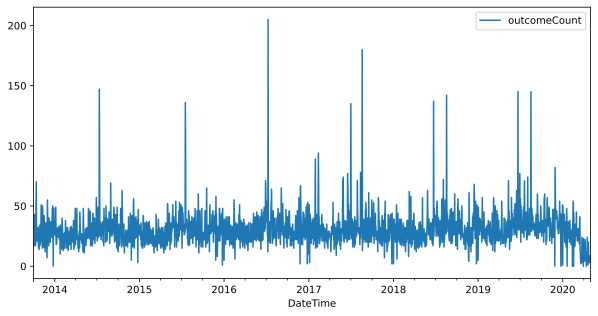

In [9]:
# plotar o gráfico diário
fig, ax = plt.subplots(figsize=(10,5))

adoptions_df.resample('D').sum().plot(ax=ax)

plt.show()

Podemos notar uma tendência de queda no número de adoções no ano de 2020, provavelmente motivado pela pandemia de COVID-19. Além disso, aparecem alguns picos por volta da metade do ano. Para uma visualização um pouco mais limpa, vamos verificar o gráfico semanal.

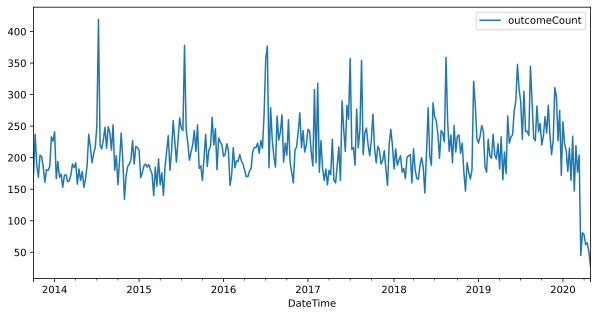

In [10]:
# plotar o gráfico semanal
fig, ax = plt.subplots(figsize=(10,5))

adoptions_df.resample('W').sum().plot(ax=ax)

plt.show()

No gráfico semanal fica ainda mais evidente a queda abrupta no número de adoções no ano de 2020. Antes de prepararmos nossos dados para os modelos de previsão, vamos verificar a primeira e última data de nosso *dataset*.

In [11]:
# checando de quando são a primeira e última entrada
print(adoptions_df.index.min())
print(adoptions_df.index.max())

2013-10-01 09:31:00
2020-04-30 16:37:00


O *dataset* apresenta registros de adoções que vão desde 01 de outubro de 2013 até 30 de abril de 2020.

## Preparação dos Dados

Para que o modelo de *forecasting* do ***Prophet*** possa ser utilizado, ele deve receber como entrada duas colunas: uma nomeada como ***ds*** e a outra como ***y***. A coluna ***ds*** deve conter as datas e a coluna ***y*** a informação a ser prevista (quantidade de adoções por dia em nosso caso).

In [12]:
# retirando a coluna de datas do index e renomeando as colunas
rename = {'DateTime': 'ds', 'outcomeCount': 'y'}
prophet_df = adoptions_df.resample('D').sum().reset_index().rename(columns=rename)

# verificar as 5 primeiras entradas
prophet_df.head()

,ds,y
0,2013-10-01,24
1,2013-10-02,27
2,2013-10-03,17
3,2013-10-04,20
4,2013-10-05,43


Pronto! Agora nossos dados podem ser utilizados para fazer as previsões!

## Criação do Modelo de Forecasting

Seguindo a mesma lógica de antes, iremos criar modelos com previsão diária e semanal. O próprio *framework* já possui os feriados para alguns países, sendo assim, vamos adicionar os feriados dos Estados Unidos em nossos modelos.

### Modelo Diário

Após instanciar o modelo do ***Prophet***, podemos adicionar os feriados e devemos ajustar o modelo aos nossos dados, determinar o período que ele deve realizar as previsões e, por último, fazer as previsões. Ademais, o *framework* também possui funções para plotar os gráficos das previsões.

In [13]:
# instanciar e treinar o modelo
model = Prophet()
model.add_country_holidays(country_name='US')
model.fit(prophet_df)

# determinar o período de dias para previsão
future = model.make_future_dataframe(periods=365)

# realizar a previsão para o período estabelecido
forecast = model.predict(future)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


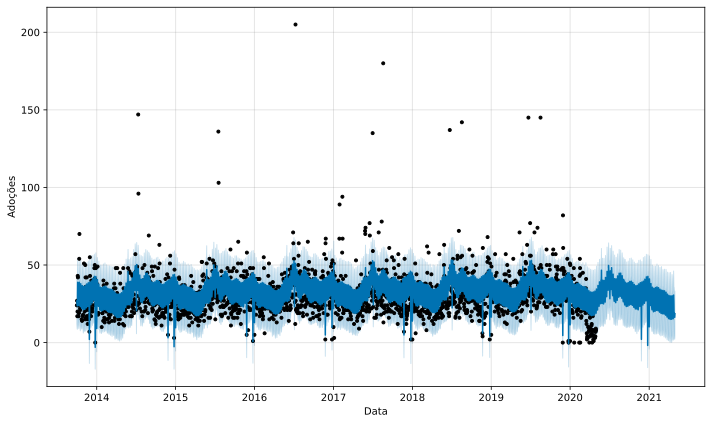

In [14]:
# visualizar o gráfico com as previsões
model.plot(forecast, xlabel='Data', ylabel='Adoções');

Podemos ver que a previsão foi feita seguindo as tendências e sazonalidades dos dados históricos. É importante analisarmos também os diferentes componentes do nosso modelo.

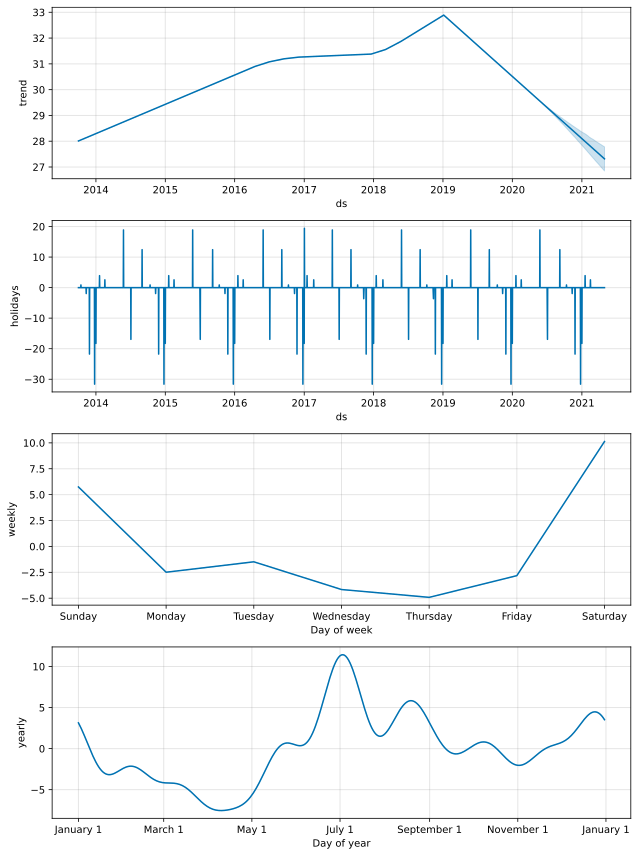

In [15]:
# separar os componentes do modelo
model.plot_components(forecast);

Podemos retirar algumas informações interessantes dos gráficos acima:
* Até 2019 as adoções apresentavam tendência de crescimento. A partir desse ano a tendência inverteu para queda. Seria interessante analisar se essa queda é decorrente a fatores internos ou externos à organização. Se forem internos, podem estar relacionados a campanhas de adoção que se tornaram ineficientes.
* Em geral, os feriados implicam em mais quedas do que aumentos no número de adoções.
* Os dias de final de semana são os que apresentam maiores números de adoções, o que é esperado dado que as pessoas possuem mais tempo nesses dias para ir até o abrigo e escolher um animal para adoção.
* O pico mais alto é no mês de julho, o que também faz sentido dado que é época de férias e bate com os picos de adoções recorrentes por volta da metade dos anos que havíamos identificado antes. 

### Modelo Semanal

Da mesma maneira que fizemos para o modelo diário, iremos realizar as previsões levando em conta os dados semanais. Para isso, criaremos uma variável contendo uma coluna de data agrupada por semana e uma outra coluna contendo a soma de adoções semanais.

In [16]:
# criar um modelo baseado em semanas
prophet_df2 = adoptions_df.resample('W').sum().reset_index().rename(columns=rename)

# instanciar e treinar o modelo
model2 = Prophet()
model2.add_country_holidays(country_name='US')
model2.fit(prophet_df2)

# determinar o período de dias para previsão
future2 = model2.make_future_dataframe(periods=365)

# realizar a previsão para o período estabelecido
forecast2 = model2.predict(future2)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


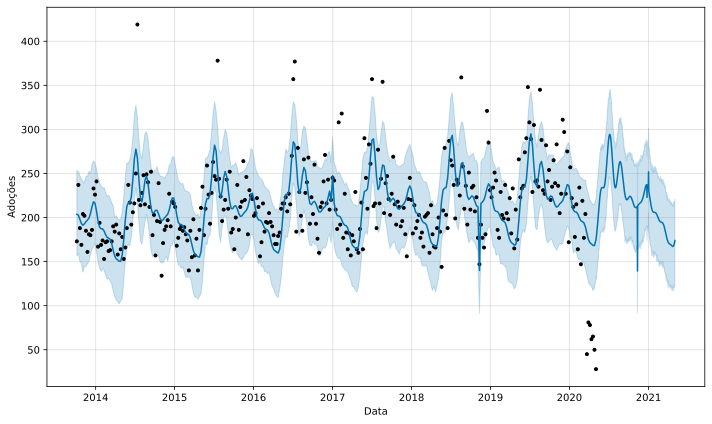

In [17]:
# visualizar o gráfico com as previsões
model2.plot(forecast2, xlabel='Data', ylabel='Adoções');

Com o modelo semanal é mais fácil de acompanhar as tendências e sazonalidades do gráfico.

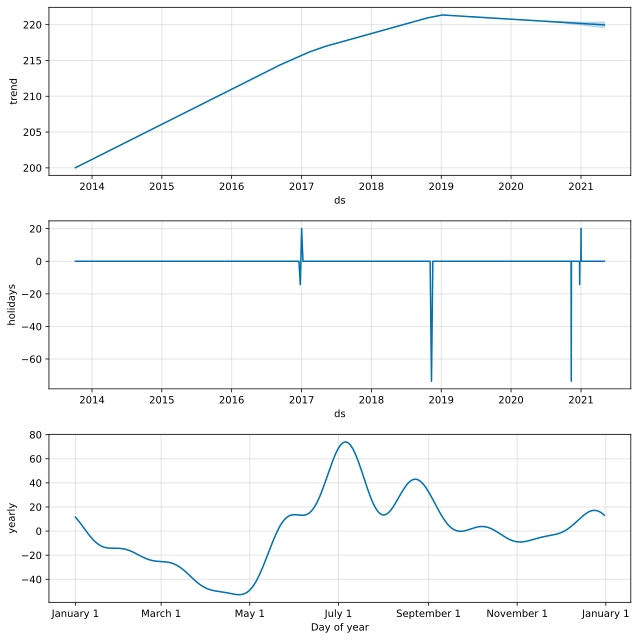

In [18]:
# separar os componentes do modelo
model2.plot_components(forecast2);

O modelo semanal apresenta informações semelhantes ao diário com uma inversão da tendência de crescimento para queda em 2019, o impacto negativo dos feriados e o pico de aumento em julho.

## Avaliação dos Modelos

A avaliação dos modelos pelo ***Prophet*** pode ser feita com *cross-validation*, onde são realizados cortes em 6 datas diferentes de nosso histórico. Para cada corte feito, são realizadas previsões com base nos dados restantes e comparadas com os valores verdadeiros.

As métricas de avaliação que vamos levar em consideração para avaliar nossos modelos são MAPE e MdAPE dado sua maior facilidade de interpretação.

### MAPE

**MAPE** é a sigla para ***Mean Absolute Percentage Error*** ou Média Percentual Absoluta do Erro. Ele representa o erro percentual médio das previsões. Sendo assim, quanto mais baixo ele for, melhor. A fórmula do MAPE pode ser representada por:

$$MAPE = \frac{1}{n} \sum_{t=1}^{n}|\frac{A_t - F_t}{A_t}|$$

onde:
* $A_t$ é o valor correto;
* $F_t$ é o valor previsto; e
* $n$ representa o número de pontos previstos.

### MdAPE

***MdAPE*** é a sigla para ***Median Absolute Percentage Error*** ou Mediana Percentual Absoluta do Erro. Ele é obtido ordenando os erros percentuais absolutos em ordem crescente e pegando o valor do meio. Caso eles estejam em número par, calcula-se a média dos dois valores centrais.

### Modelo Diário

Primeiro vamos realizar o *cross-validation* com nossos dados que retornará uma tabela contendo a data (*ds*) e os valores previstos médio (*yhat*), mínimo (*yhat_lower*) e máximo (*yhat_upper*), assim como o valor verdadeiro (*y*) e a data de corte (*cutoff*).

In [19]:
from fbprophet.diagnostics import cross_validation
df_cv = cross_validation(model, horizon = '365 days')
df_cv.head()

INFO:fbprophet:Making 6 forecasts with cutoffs between 2016-10-30 12:00:00 and 2019-05-01 00:00:00


,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2016-10-31,25.984661,13.186760,39.345326,25,2016-10-30 12:00:00
1,2016-11-01,26.044484,13.732219,38.310129,25,2016-10-30 12:00:00
2,2016-11-02,23.757145,11.037665,35.848714,22,2016-10-30 12:00:00
3,2016-11-03,23.314460,10.959515,34.924446,30,2016-10-30 12:00:00
4,2016-11-04,24.441366,12.554449,36.959071,35,2016-10-30 12:00:00


O ***Prophet*** nos permite também obter uma tabela com diferentes métricas de avaliação e um gráfico para ver como o erro se comporta quanto mais nos afastamos da data de corte.

In [20]:
# gerar a tabela com as métricas de avaliação
from fbprophet.diagnostics import performance_metrics
df_p = performance_metrics(df_cv)
df_p.head()

INFO:fbprophet:Skipping MAPE because y close to 0


,horizon,mse,rmse,mae,mdape,coverage
0,36 days 12:00:00,117.218709,10.826759,8.120803,0.217920,0.808219
1,37 days 00:00:00,117.292023,10.830144,8.136431,0.217920,0.808219
2,37 days 12:00:00,119.482742,10.930816,8.284880,0.233463,0.803653
3,38 days 00:00:00,118.767700,10.898059,8.240048,0.222851,0.803653
4,38 days 12:00:00,118.448198,10.883391,8.211966,0.220024,0.808219


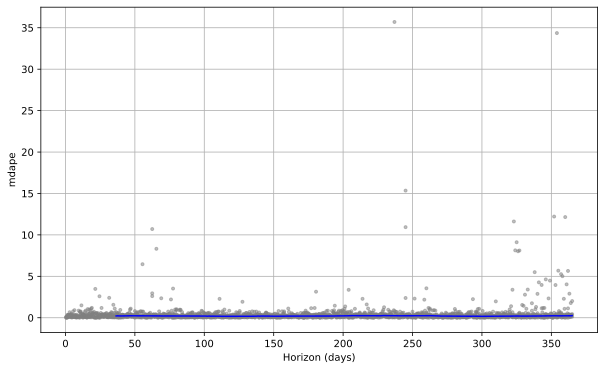

In [21]:
# criar um gráfico com o comportamento da métrica MDAPE
from fbprophet.plot import plot_cross_validation_metric
fig = plot_cross_validation_metric(df_cv, metric='mdape')

Pode-se notar que foi retornado um aviso falando que não foi possível calcular o MAPE então usaremos o MdAPE. Verificamos que ele se encontra em uma faixa de 21 a 23%, ou seja, o erro nas previsões do modelo diário é em torno de 22%. Além disso, vemos que o erro permanece relativamente constante durante todo o horizonte de previsão.

### Modelo Semanal

Da mesma maneira que fizemos para o modelo diário, vamos calcular os erros para o modelo semanal.

INFO:fbprophet:Making 6 forecasts with cutoffs between 2016-11-02 12:00:00 and 2019-05-04 00:00:00


           horizon          mse       rmse  ...      mape     mdape  coverage
0 36 days 00:00:00  1332.724330  36.506497  ...  0.148179  0.129529  0.677419
1 36 days 12:00:00  1351.180693  36.758410  ...  0.150238  0.131693  0.677419
2 37 days 00:00:00  1351.303409  36.760079  ...  0.149669  0.129529  0.677419
3 37 days 12:00:00  1510.335175  38.863031  ...  0.162812  0.131693  0.645161
4 38 days 00:00:00  1519.563106  38.981574  ...  0.165191  0.131693  0.645161

[5 rows x 7 columns] 



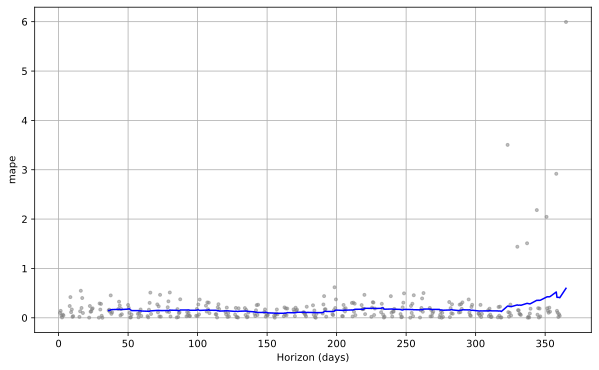

In [22]:
# realizar o cross-validation
from fbprophet.diagnostics import cross_validation
df_cv2 = cross_validation(model2, horizon = '365 days')

# criar a tabela com as métricas de avaliação
from fbprophet.diagnostics import performance_metrics
df_p2 = performance_metrics(df_cv2)
print(df_p2.head(), "\n")

# criar o gráfico com o MAPE ao longo do horizonte de previsão
from fbprophet.plot import plot_cross_validation_metric
plot_cross_validation_metric(df_cv2, metric='mape');

Podemos verificar que o MdAPE está em torno de 13% e o MAPE um pouco acima ficando em torno de 15%. É intuitivo pensarmos que quanto mais específica a previsão, maior tende a ser o erro, sendo assim, a previsão diária apresenta um erro bem acima da previsão semanal. Além disso, nota-se que acima de 300 dias em nosso horizonte de previsão, o erro tende a aumentar.

## Conclusão

Vimos que o ***Prophet*** é um *framework* muito útil ao lidarmos com séries temporais com grande quantidade de dados históricos. Ele nos permite realizar as previsões estatísticas de maneira simples, enquanto ainda nos possibilita personalizar as previsões inserindo datas de feriados. Ele permite, ainda, adicionar manualmente pontos de mudança de tendência, o que pode ser útil quando o profissional utiliza sua experiência para aperfeiçoar o modelo (um exemplo seria adicionar a um modelo de previsão de vendas a data de *Black Friday*).

Outras melhorias poderiam ser feitas verificando se nossa série temporal é estacionária ou não e removendo outliers, por exemplo. No entanto, o intuito deste projeto é mostrar a aplicação do ***Prophet***. Caso você deseje descobrir mais opções de personalização dos modelos do ***Prophet***, recomendo [acessar sua documentação](https://facebook.github.io/prophet/docs/quick_start.html), onde também pode ser encontrado o *Paper* que explica como ele foi construído. Espero que você consiga aplicá-lo em sua realidade, seja para prever vendas, tráfego em seu *website* ou qualquer outra aplicação possível. 

Se você curtiu e quiser ver outras aplicações de *Data Science*, fique a vontade para entrar lá no [meu Github](https://github.com/beniciowg/data-science-projects) e [me seguir no LinkedIn](https://www.linkedin.com/in/benicio-wiggers-jr/).